In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow import keras
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.applications import InceptionV3

In [ ]:
model = InceptionV3(weights='imagenet', include_top=True)

model.summary()

96112376/96112376 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [ ]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = '/content/drive/MyDrive/Garbage_classification_dataset/Garbageclassification/Garbageclassification/plastic/plastic1.jpg'

img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [ ]:
img_array.shape

(1, 299, 299, 3)

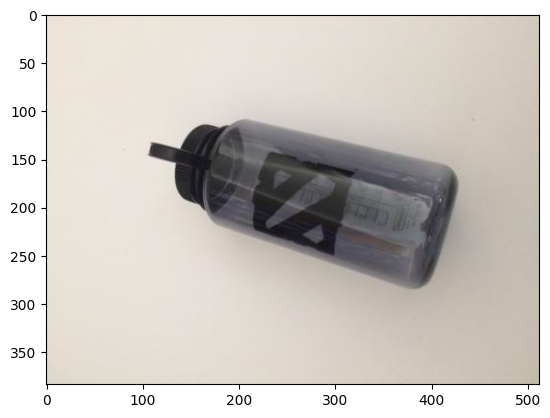

In [ ]:



image = Image.open(image_path)
plt.imshow(image)

In [ ]:
predictions = model.predict(img_array)

print(type(predictions))
print(predictions.shape)

1/1 [==============================] - 4s 4s/step
<class 'numpy.ndarray'>
(1, 1000)


In [ ]:
decoded_predictions = decode_predictions(predictions)


35363/35363 [==============================] - 0s 0us/step


In [ ]:
print("Prediction:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} (confidence score : {score:.2f} )")


Prediction:
1: pill_bottle (confidence score : 0.30 )
2: syringe (confidence score : 0.06 )
3: screwdriver (confidence score : 0.03 )
4: thimble (confidence score : 0.03 )
5: oil_filter (confidence score : 0.02 )


In [ ]:
from keras.applications import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import History
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


In [ ]:
dataset_path = '/content/drive/MyDrive/Garbage_classification_dataset/Garbageclassification/Garbageclassification/'
batch_size = 8

In [ ]:
# Load the dataset and labels
data, labels = [], []
max_images_per_class = 500

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    if os.path.isdir(class_path):
        images_count = 0

        for image_file in os.listdir(class_path):
            if images_count >= max_images_per_class:
                break

            image_path = os.path.join(class_path, image_file)
            img = image.load_img(image_path, target_size=(299, 299))
            img_array = image.img_to_array(img)
            #img_array = preprocess_input(img_array)  # Preprocess for InceptionV3
            data.append(img_array)
            labels.append(class_folder)

            images_count += 1


# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# One-hot encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels_one_hot, test_size=0.3, random_state=42)


In [ ]:
data.shape

(2432, 299, 299, 3)

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

#freeze the pretrained weights
for layer in base_model.layers:
    layer.trainable = False


model = models.Sequential()
model.add(base_model)
#model.add(layers.Flatten())
#model.add(layers.Dense(2048, activation='relu'))
#model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dense(1024, activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='softmax'))


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint("best_model", monitor="val_loss", save_best_only=True, mode="min")

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
X_test.shape

(730, 299, 299, 3)

In [ ]:
# Set up history callback to collect training metrics
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=8, callbacks=[checkpoint])

Epoch 1/20
213/213 [==============================] - 103s 459ms/step - loss: 1.6326 - accuracy: 0.4101 - val_loss: 1.5745 - val_accuracy: 0.5027
Epoch 2/20
213/213 [==============================] - 35s 164ms/step - loss: 1.1781 - accuracy: 0.5828 - val_loss: 1.4250 - val_accuracy: 0.5370
Epoch 3/20
213/213 [==============================] - 36s 172ms/step - loss: 1.0018 - accuracy: 0.6404 - val_loss: 1.2709 - val_accuracy: 0.5712
Epoch 4/20
213/213 [==============================] - 7s 34ms/step - loss: 0.9060 - accuracy: 0.6639 - val_loss: 1.3375 - val_accuracy: 0.5685
Epoch 5/20
213/213 [==============================] - 7s 34ms/step - loss: 0.7721 - accuracy: 0.7321 - val_loss: 1.2717 - val_accuracy: 0.5753
Epoch 6/20
213/213 [==============================] - 7s 34ms/step - loss: 0.6887 - accuracy: 0.7526 - val_loss: 1.3413 - val_accuracy: 0.5877
Epoch 7/20
213/213 [==============================] - 7s 33ms/step - loss: 0.6159 - accuracy: 0.7879 - val_loss: 1.2915 - val_accuracy:

In [ ]:
!nvidia-smi

In [ ]:
from keras.models import load_model

saved_model = load_model("best_model")

_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)

print("Train: {:.3f}, Test: {:.3f}".format(train_acc, test_acc))

Train: 0.786, Test: 0.571


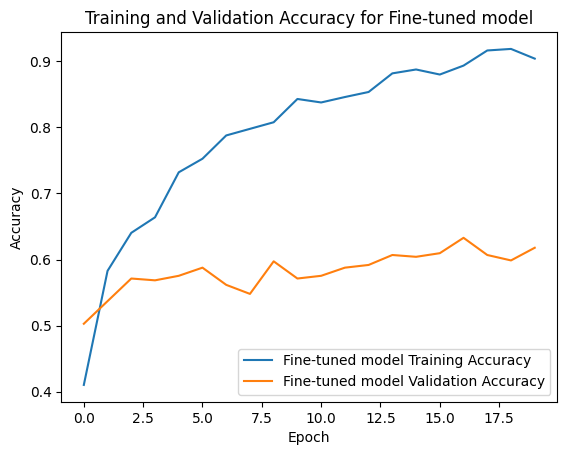

In [ ]:
# Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Fine-tuned model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Fine-tuned model Validation Accuracy')
plt.title('Training and Validation Accuracy for Fine-tuned model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

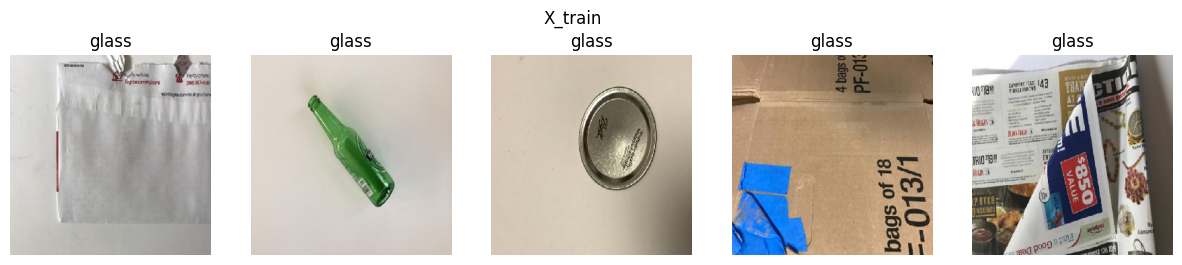

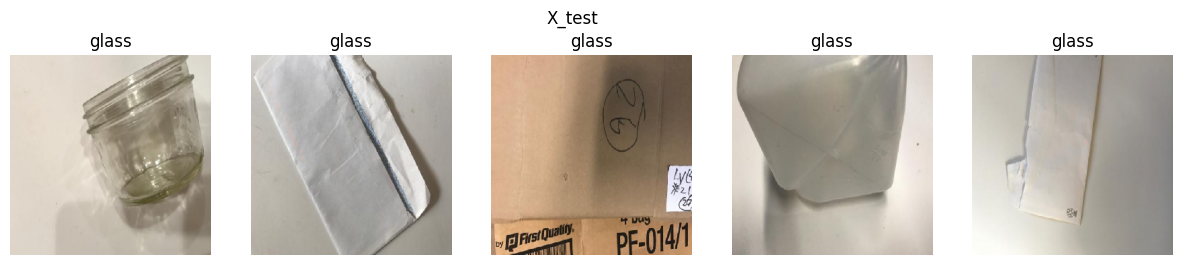

In [ ]:
# Function to plot images
def plot_images(images, labels, title):
    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot first 5 images from X_train
plot_images(X_train[:5] / 255.0, labels[:5], title='X_train')

# Plot first 5 images from X_test
plot_images(X_test[:5] / 255.0, labels[:5], title='X_test')

In [ ]:
import numpy as np

# Convert one-hot encoded labels back to class indices
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

# Count instances in train dataset
train_class_counts = np.unique(y_train_indices, return_counts=True)
train_class_counts_dict = dict(zip(train_class_counts[0], train_class_counts[1]))

# Count instances in test dataset
test_class_counts = np.unique(y_test_indices, return_counts=True)
test_class_counts_dict = dict(zip(test_class_counts[0], test_class_counts[1]))

# Print the results
print("Train dataset class counts:")
print(train_class_counts_dict)

print("\nTest dataset class counts:")
print(test_class_counts_dict)


Train dataset class counts:
{0: 279, 1: 337, 2: 295, 3: 358, 4: 331, 5: 102}

Test dataset class counts:
{0: 124, 1: 163, 2: 115, 3: 142, 4: 151, 5: 35}


In [ ]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = '/content/drive/MyDrive/Garbage_classification_dataset/Garbageclassification/Garbageclassification/plastic/plastic1.jpg'

img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


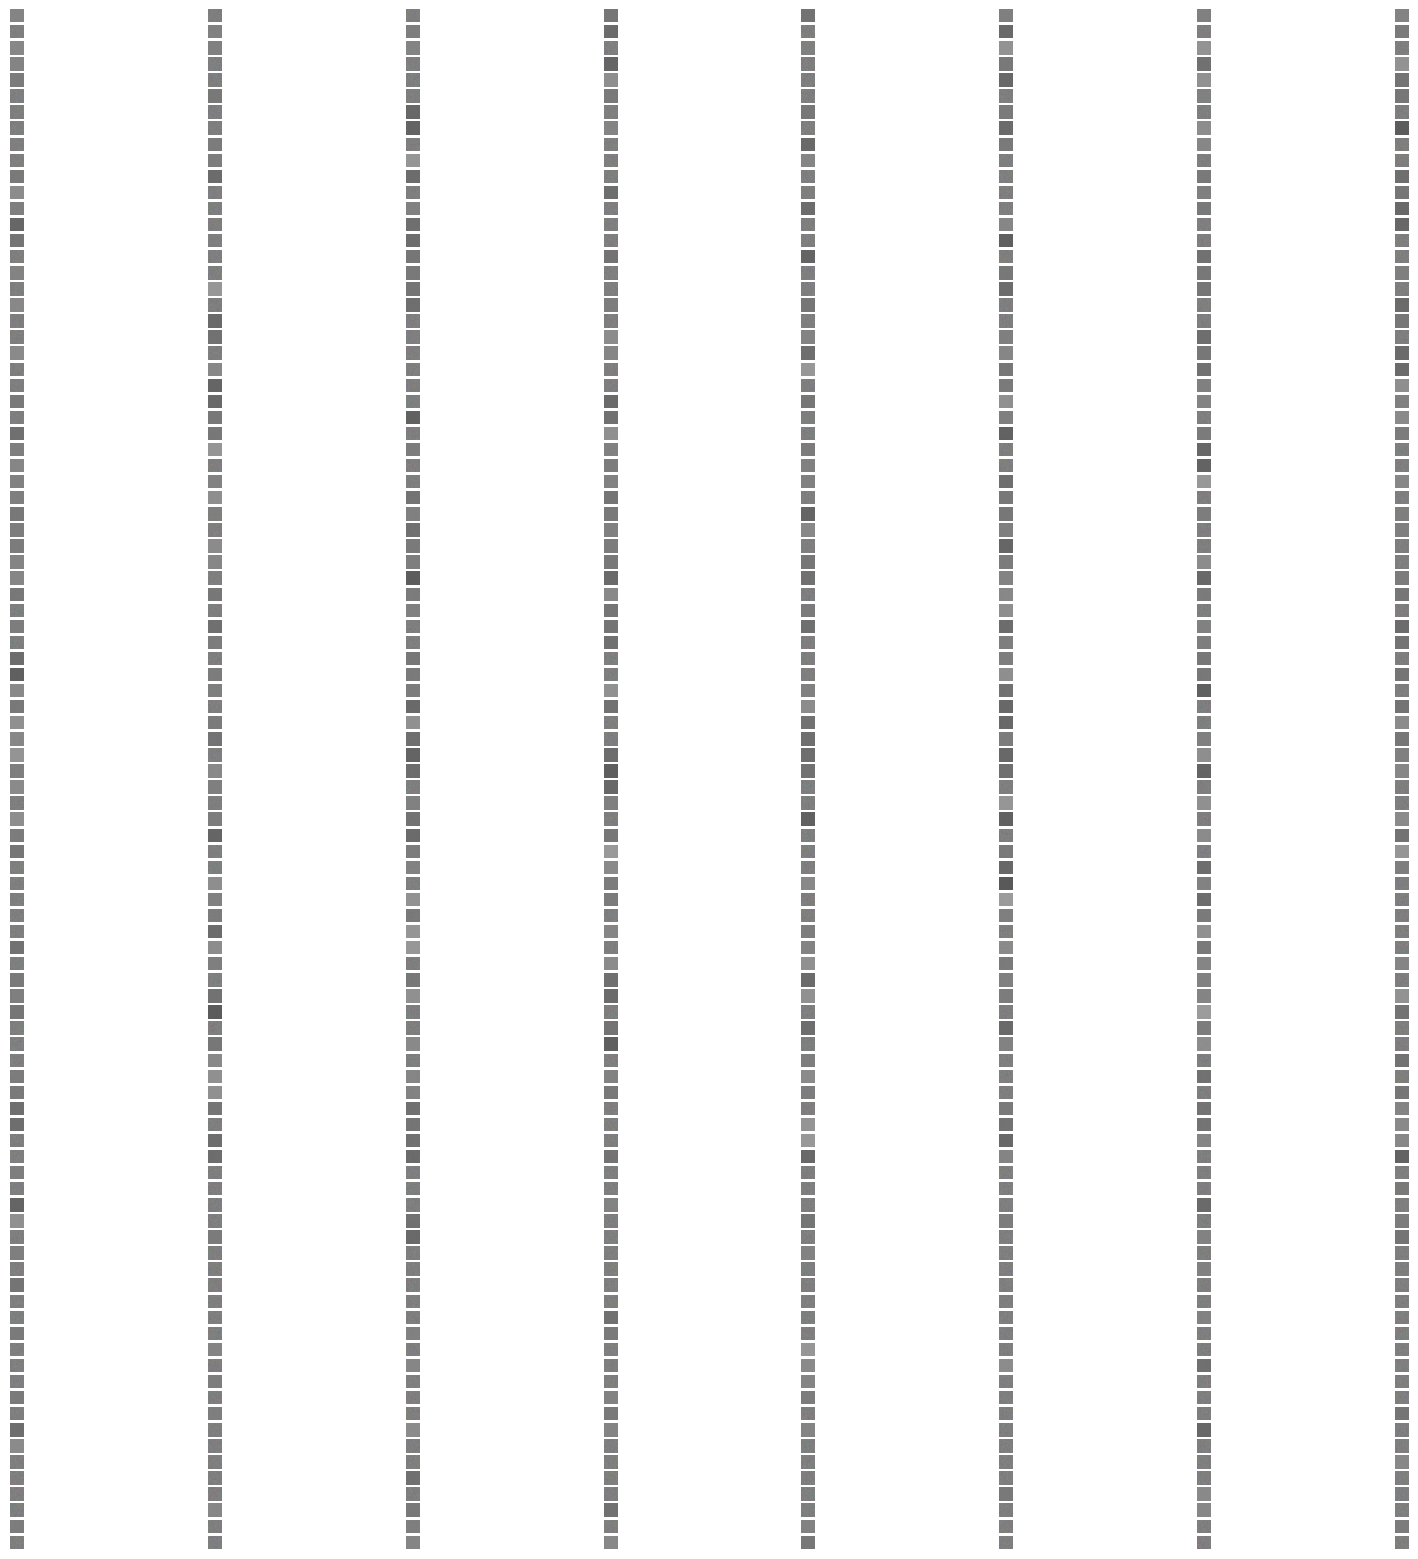

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# Load InceptionV3 model with pretrained weights
base_model = InceptionV3(weights='imagenet', include_top=False)

# Choose a specific layer for visualization (you can choose any intermediate layer)
layer_name = 'mixed5'  # Change this to the layer you want to visualize

# Create a model that outputs the activation of the selected layer
activation_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Function to generate an image that maximally activates a specific filter in the selected layer
def generate_max_activation_image(filter_index, size=(299, 299)):
    input_img_data = np.random.random((1, size[0], size[1], 3)).astype('float32') * 20 + 128.  # Random noise as initial input

    input_img = tf.Variable(input_img_data)

    with tf.GradientTape() as tape:
        layer_output = activation_model(input_img)
        loss = tf.reduce_mean(layer_output[:, :, :, filter_index])

    grads = tape.gradient(loss, input_img)
    grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

    input_img_data += grads.numpy() * 5.  # Adjust the step size

    img = input_img_data[0]
    img -= img.min()
    img /= img.max()
    img *= 255
    return img.astype('uint8')

# Number of filters in the selected layer
num_filters = activation_model.output_shape[-1]

# Generate and display images that maximally activate each filter in the selected layer
plt.figure(figsize=(20, 20))
for filter_index in range(num_filters):
    img = generate_max_activation_image(filter_index)
    plt.subplot(num_filters // 8, 8, filter_index + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


1/1 [==============================] - 1s 725ms/step


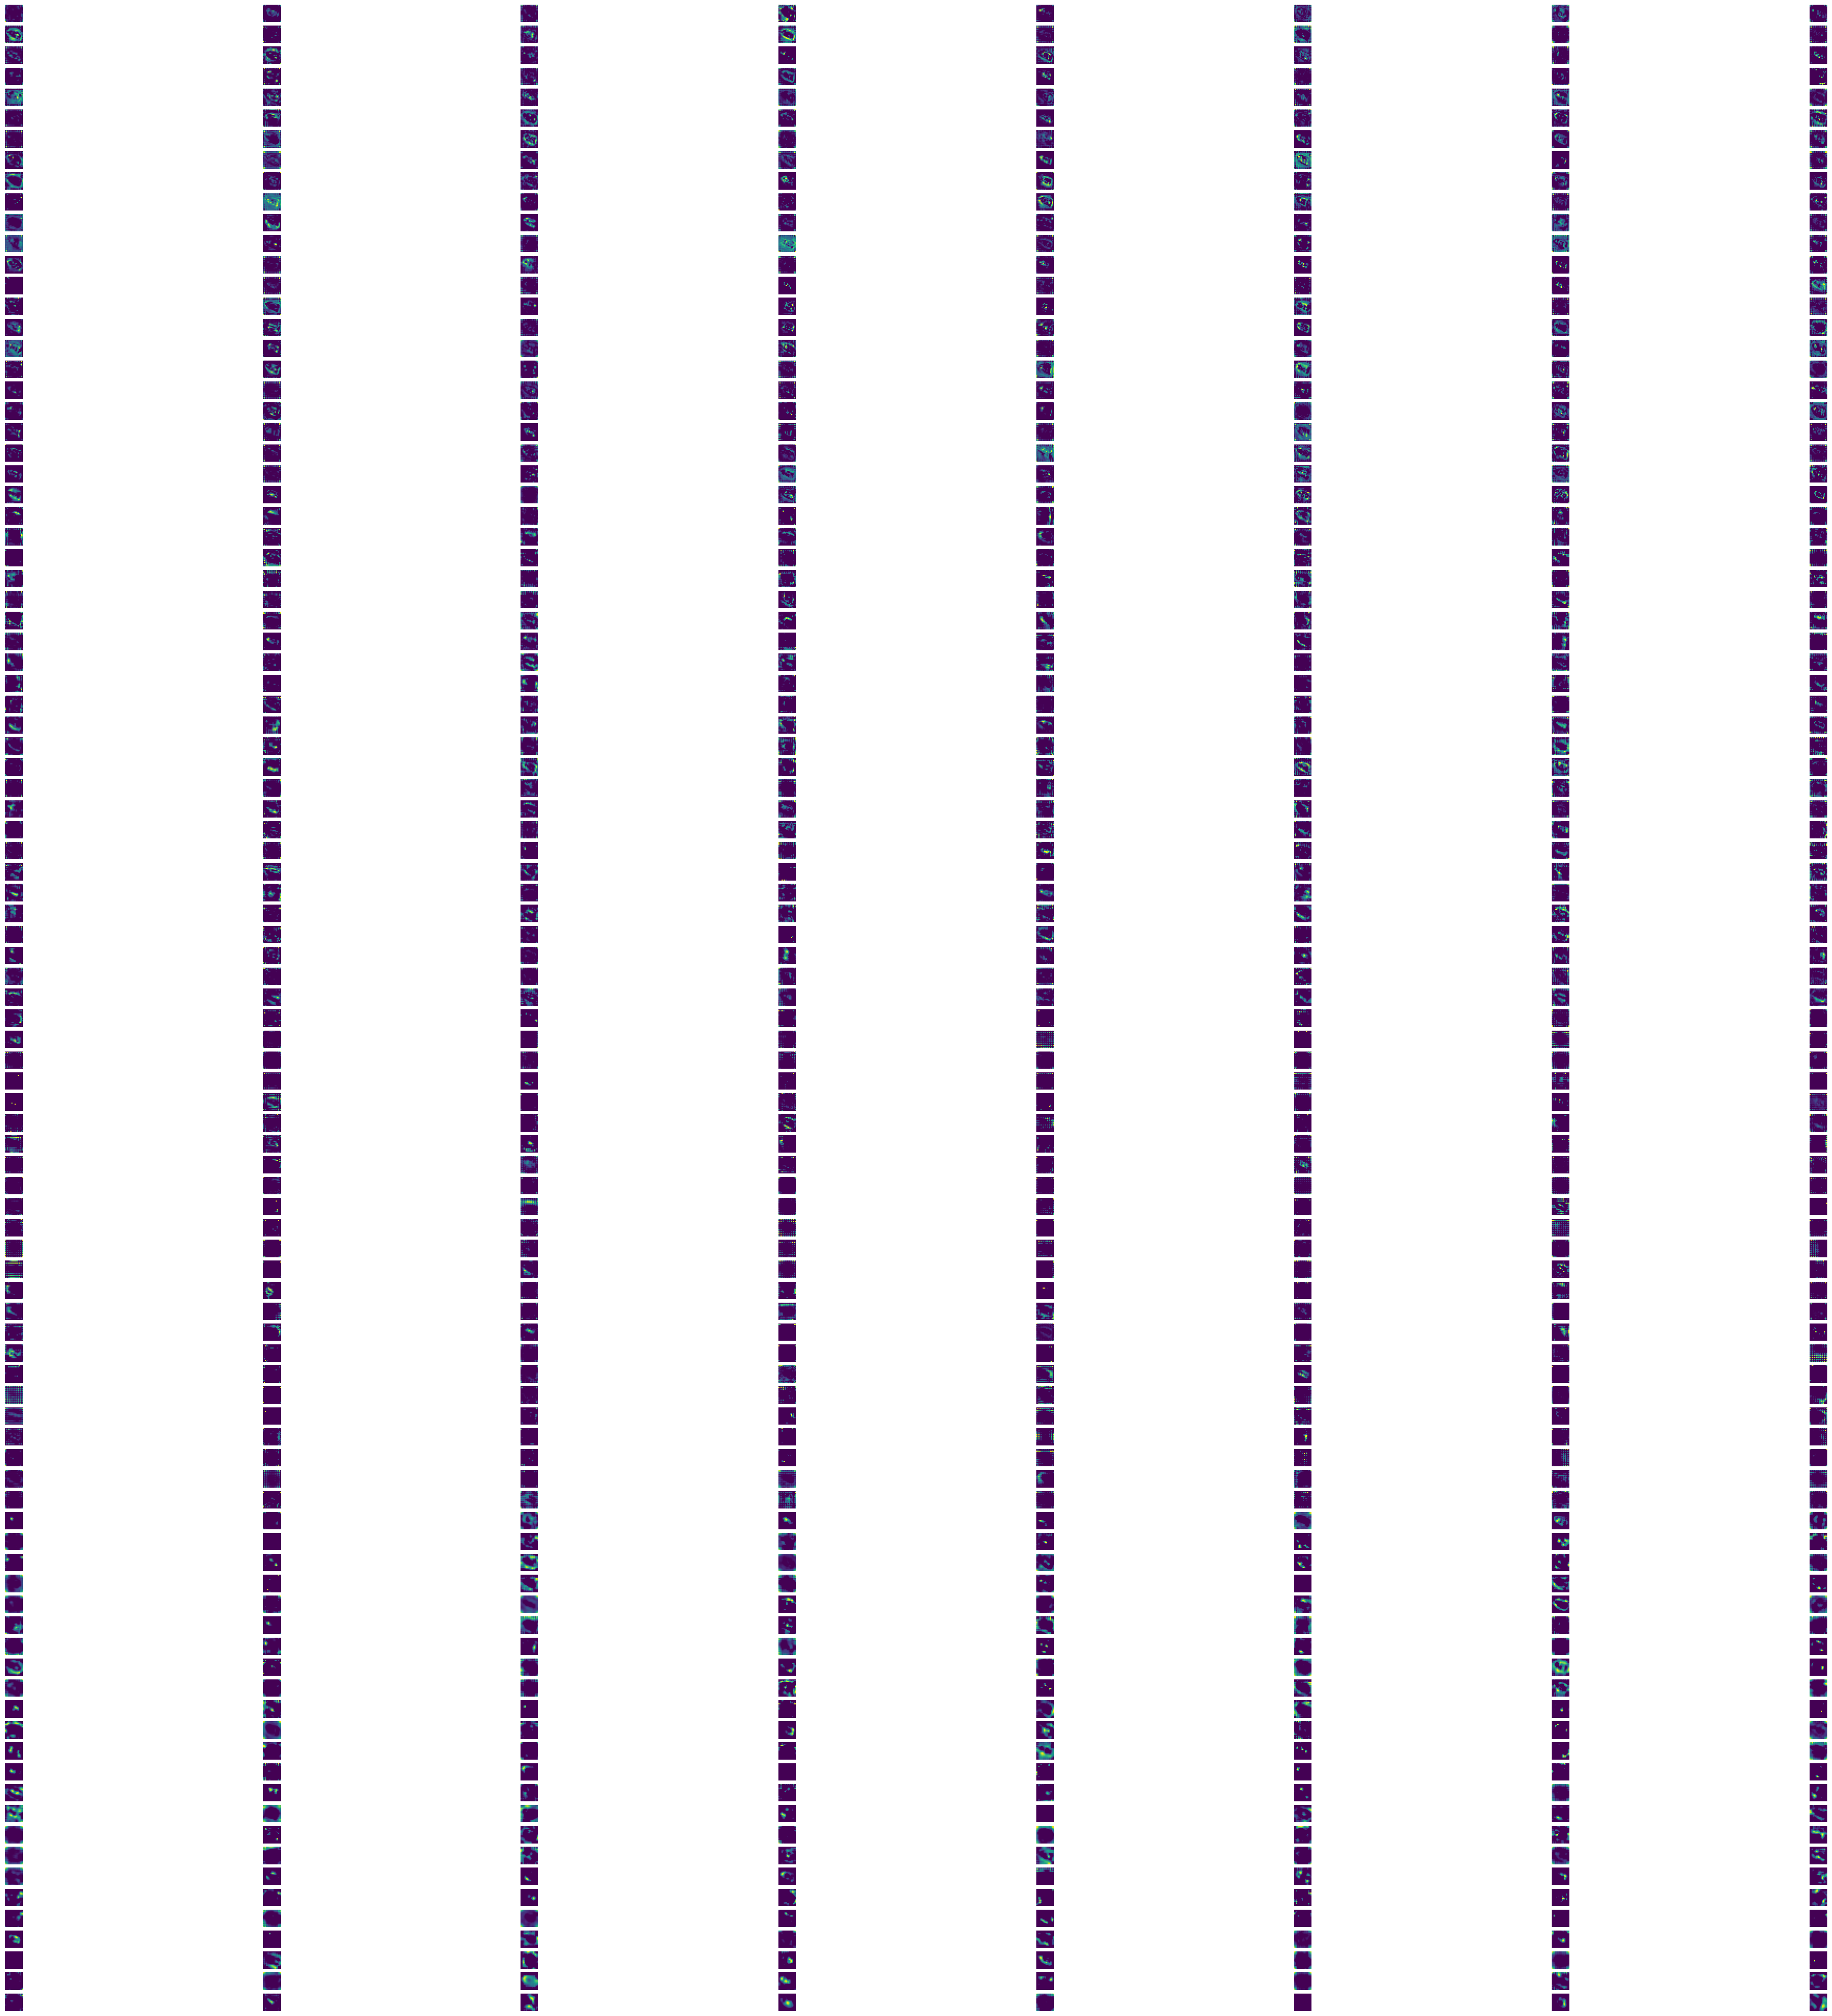

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# Load InceptionV3 model with pretrained weights
base_model = InceptionV3(weights='imagenet', include_top=False)

# Choose a specific layer for visualization (you can choose any intermediate layer)
layer_name = 'mixed5'  # Change this to the layer you want to visualize

# Create a model that outputs the activations of the selected layer
activation_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

image_path = '/content/drive/MyDrive/Garbage_classification_dataset/Garbageclassification/Garbageclassification/plastic/plastic1.jpg'

img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the activations of the selected layer for the input image
activations = activation_model.predict(img_array)

# Visualize the feature maps
num_filters = activations.shape[-1]
rows = num_filters // 8  # Assuming 8 columns for visualization
cols = 8

plt.figure(figsize=(50, 50))
for i in range(num_filters):
    plt.subplot(rows, cols, i+1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_752 (B  (None, 2048)              8192      
 atchNormalization)                                              
                                                                 
 dense_13 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_14 (Dense)            (None, 6)                 6150      
                                                                 
Total params: 23915302 (91.23 MB)
Trainable params: 21

In [ ]:
!pip install nbconvert

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-extra set to manually installed.
texlive-xetex is already the newest version (2021.20220204-1).
The following NEW packages will be installed:
  texlive
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 14.3 kB of archives.
After this operation, 73.7 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 texlive all 2021.20220204-1 [14.3 kB]
Fetched 14.3 kB in 0s (273 kB/s)
Selecting previously unselected package texlive.
(Reading database ... 158578 files and directories currently installed.)
Preparing to unpack .../texlive_2021.20220204-1_all.deb ...
Unpacking texlive (2021.20220204-1) ...
Setting up texlive (2021.20220204-1) ...


In [ ]:
!jupyter nbconvert --to pdf /content/drive/MyDrive/NNDL_lab2_part2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/NNDL_lab2_part2.ipynb to pdf
[NbConvertApp] Support files will be in NNDL_lab2_part2_files/
[NbConvertApp] Making directory ./NNDL_lab2_part2_files
[NbConvertApp] Making directory ./NNDL_lab2_part2_files
[NbConvertApp] Making directory ./NNDL_lab2_part2_files
[NbConvertApp] Making directory ./NNDL_lab2_part2_files
[NbConvertApp] Making directory ./NNDL_lab2_part2_files
[NbConvertApp] Making directory ./NNDL_lab2_part2_files
[NbConvertApp] Writing 115651 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1537080 bytes to /content/drive/MyDrive/NNDL_lab2_part2.pdf
